In [1]:
#Some import Important Libaray
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the Data set
df = pd.read_csv("/content/drive/My Drive/creditcard.csv")

#Exploring the Data set (EDA)

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Describe the Object type data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
#how to check columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#How to check NaN values
df.isnull().sum().sum()

0

In [8]:
#define groupby data
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [9]:
#Describe pivot table
df.pivot_table(columns='Class')

Class,0,1
Amount,88.291022,122.211321
Time,94838.202258,80746.806911
V1,0.008258,-4.771948
V10,0.009824,-5.676883
V11,-0.006576,3.800173
V12,0.010832,-6.259393
V13,0.000189,-0.109334
V14,0.012064,-6.971723
V15,0.000161,-0.092929
V16,0.007164,-4.139946


In [10]:
#find unique value
df['Class'].unique()

array([0, 1])

Text(0.5, 1.0, 'Target Visulization Balanced Data set')

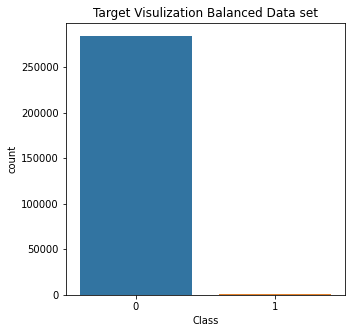

In [11]:
#Data Visulization
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=df)
plt.title('Target Visulization Balanced Data set')

#Note--- 0 is a Normal Transection and 1 is Fraud Transection 
Normal Transection is more than Fraud Transection repersent by above plot

#Slicing the Data set using iloc function

In [12]:
real_x = df.iloc[:,:-1]
real_y = df.iloc[:,-1]

In [13]:
real_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [14]:
real_y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

#feature Scalling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(real_x)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
data_scaled = scaler.transform(real_x)

In [18]:
real_X = pd.DataFrame(data=data_scaled)

In [19]:
real_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


In [20]:
print(df.columns.tolist())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [21]:
real_X.columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 
                  'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
                  'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [22]:
real_X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


#Feature Selection

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
X_real = SelectKBest(score_func=chi2, k=10).fit_transform(real_X,real_y)

In [25]:
X_real

array([[0.8813649 , 0.31302266, 0.47531173, ..., 0.43439239, 0.73717255,
        0.65506586],
       [0.84029849, 0.27179649, 0.45398097, ..., 0.46410518, 0.72779398,
        0.64068109],
       [0.86814082, 0.26876551, 0.41060274, ..., 0.35744263, 0.76338099,
        0.64494538],
       ...,
       [0.781102  , 0.22720215, 0.47767719, ..., 0.45382687, 0.74023885,
        0.68050373],
       [0.84958713, 0.28250841, 0.47628661, ..., 0.42999816, 0.74594621,
        0.72990794],
       [0.84960146, 0.22948762, 0.47952794, ..., 0.43972808, 0.71194186,
        0.66480734]])

#Feature Importances

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
model = ExtraTreesClassifier()
model.fit(real_x,real_y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [28]:
print(model.feature_importances_)

[0.01609547 0.01185981 0.01337693 0.03116284 0.03032257 0.0148638
 0.01210325 0.02100401 0.01266368 0.03880088 0.07710696 0.07288595
 0.13402744 0.01239621 0.12677316 0.0126877  0.05876488 0.13045958
 0.03099825 0.01481167 0.01480029 0.01659198 0.01310542 0.00974688
 0.01229796 0.01072242 0.01525749 0.0124058  0.01087874 0.01102799]


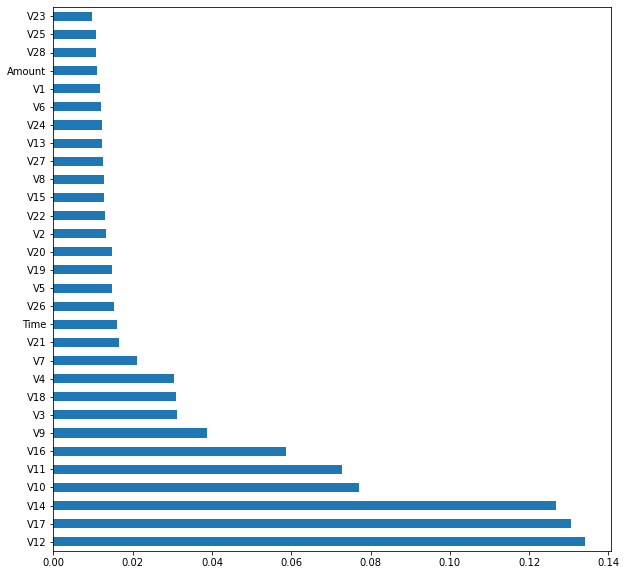

In [29]:
plt.figure(figsize=(10,10))
feature_importances = pd.Series(model.feature_importances_,index=real_X.columns)
feature_importances.nlargest(30).plot(kind='barh')
plt.show()

#Visulization Correlation Matrix

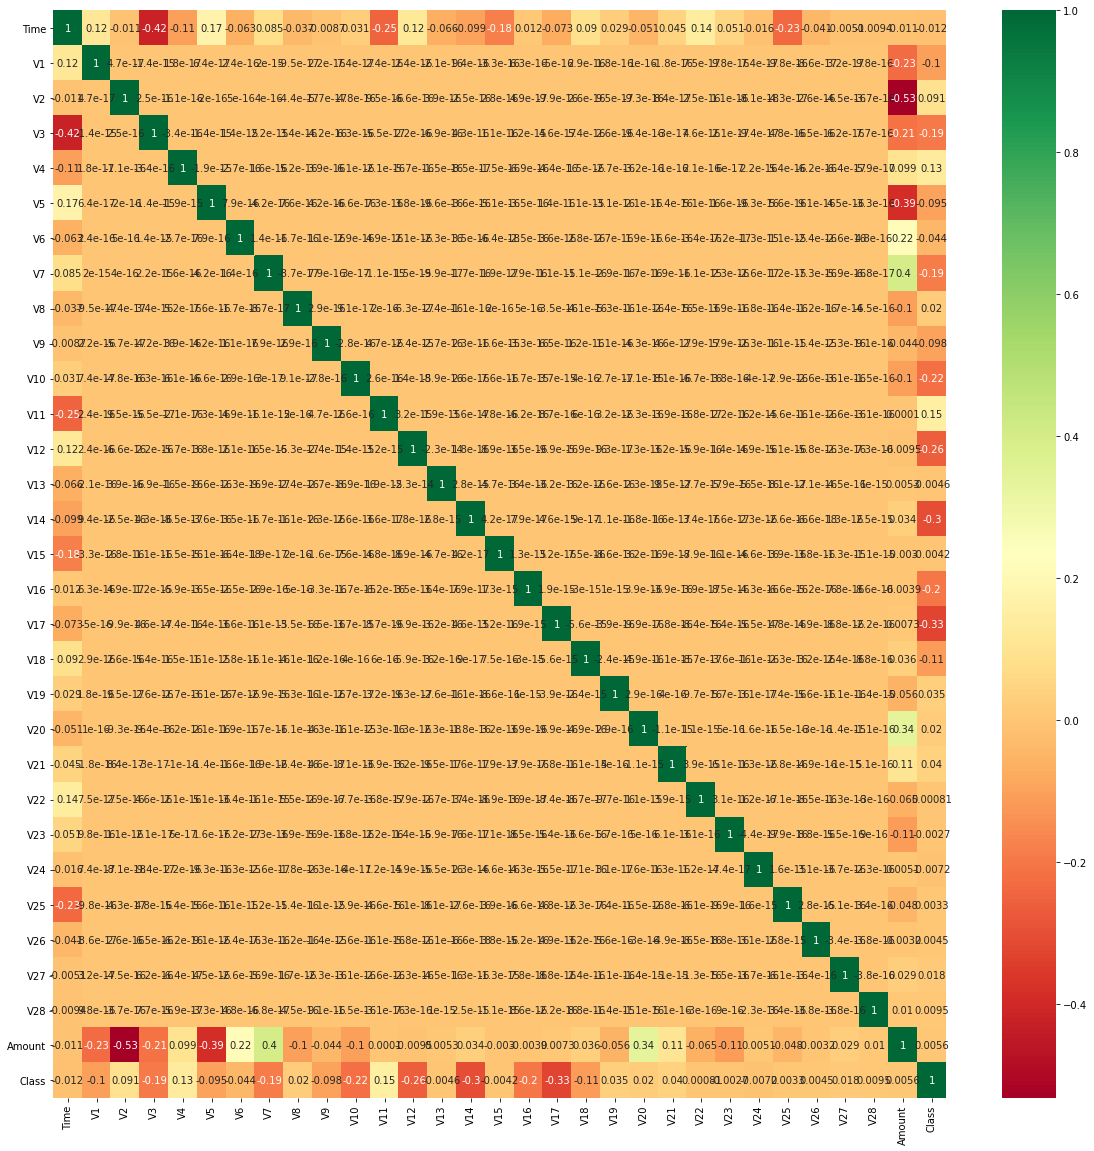

In [30]:
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Balnced The Data Set using RandomUnder Sampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
X_under, y_under = undersampling.fit_sample(X_real,real_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [33]:
df = pd.DataFrame(y_under)
df.columns=['Class']

In [34]:
df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

Text(0.5, 1.0, 'Target Visulization Balanced Data set')

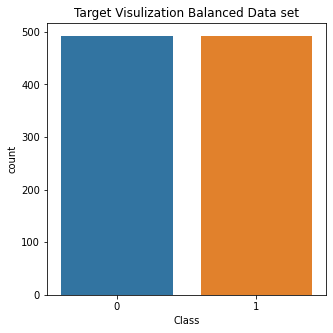

In [35]:
#Balance the Data set
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=df)
plt.title('Target Visulization Balanced Data set')

#Spiliting the Data set

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
training_x,test_x,training_y,test_y = train_test_split(X_under,y_under,test_size=0.3,random_state=42)

#Fitting the Model

In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression(penalty='l2')
lr.fit(training_x,training_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = lr.predict(test_x)

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("-------------------------------------------------")
print(classification_report(test_y,y_pred))

[[150   0]
 [ 25 121]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       150
           1       1.00      0.83      0.91       146

    accuracy                           0.92       296
   macro avg       0.93      0.91      0.91       296
weighted avg       0.93      0.92      0.91       296



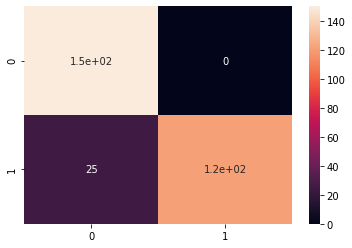

In [42]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(test_y,y_pred)

0.9155405405405406

#DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()
dt.fit(training_x,training_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
y_pred = dt.predict(test_x)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("---------------------------------------------------")
print(classification_report(test_y,y_pred))

[[141   9]
 [ 13 133]]
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       150
           1       0.94      0.91      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



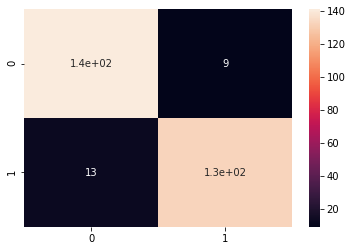

In [49]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(test_y,y_pred)

0.9256756756756757

#KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier()
knn.fit(training_x,training_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
y_pred = knn.predict(test_x)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("-------------------------------------------------------")
print(classification_report(test_y,y_pred))

[[147   3]
 [ 15 131]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       150
           1       0.98      0.90      0.94       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



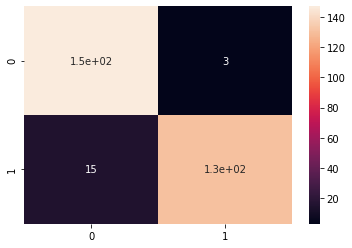

In [56]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(test_y,y_pred)

0.9391891891891891

#SVC Classifier

In [59]:
from sklearn.svm import SVC

In [60]:
svc = SVC()
svc.fit(training_x,training_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
y_pred = svc.predict(test_x)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("-----------------------------------------------------")
print(classification_report(test_y,y_pred))

[[149   1]
 [ 18 128]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       150
           1       0.99      0.88      0.93       146

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



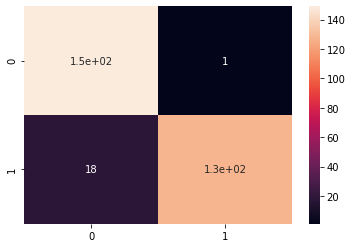

In [63]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(test_y,y_pred)

0.9358108108108109

#SGDClassifier

In [66]:
from sklearn.linear_model import SGDClassifier

In [67]:
sgd = SGDClassifier()
sgd.fit(training_x,training_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [68]:
y_pred = sgd.predict(test_x)

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("------------------------------------------------")
print(classification_report(test_y,y_pred))

[[ 87  63]
 [  4 142]]
------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.58      0.72       150
           1       0.69      0.97      0.81       146

    accuracy                           0.77       296
   macro avg       0.82      0.78      0.77       296
weighted avg       0.83      0.77      0.76       296



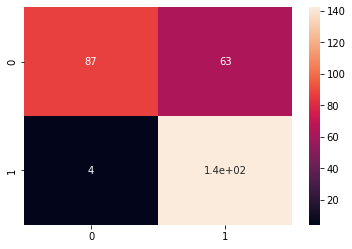

In [70]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(test_y,y_pred)

0.7736486486486487

#Naive Bayes Classifier

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gnb = GaussianNB()
gnb.fit(training_x,training_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
y_pred = gnb.predict(test_x)

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("-------------------------------------------------")
print(classification_report(test_y,y_pred))

[[148   2]
 [ 21 125]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       150
           1       0.98      0.86      0.92       146

    accuracy                           0.92       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.92      0.92       296



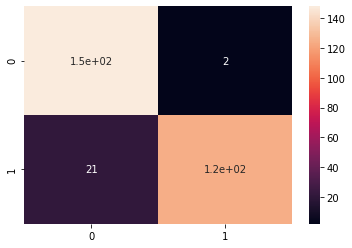

In [77]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True) 

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(test_y,y_pred)

0.9222972972972973

#MultinomialNB

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
y_pred = mnb.predict(test_x)

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("----------------------------------------------------")
print(classification_report(test_y,y_pred))

[[150   0]
 [ 35 111]]
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       150
           1       1.00      0.76      0.86       146

    accuracy                           0.88       296
   macro avg       0.91      0.88      0.88       296
weighted avg       0.90      0.88      0.88       296



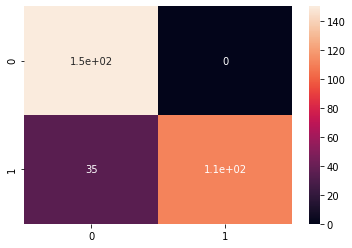

In [84]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(test_y,y_pred)

0.8817567567567568

#BernoulliNB

In [87]:
from sklearn.naive_bayes import BernoulliNB

In [88]:
bnb = BernoulliNB()
bnb.fit(training_x,training_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [89]:
y_pred = bnb.predict(test_x)

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("-------------------------------------------------------")
print(classification_report(test_y,y_pred))

[[150   0]
 [146   0]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       150
           1       0.00      0.00      0.00       146

    accuracy                           0.51       296
   macro avg       0.25      0.50      0.34       296
weighted avg       0.26      0.51      0.34       296



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


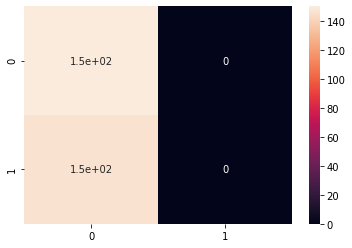

In [91]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(test_y,y_pred)

0.5067567567567568

#Bagging Classifier

In [94]:
from sklearn.ensemble import BaggingClassifier

In [95]:
bc = BaggingClassifier()
bc.fit(training_x,training_y)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [96]:
y_pred = bc.predict(test_x)

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("--------------------------------------------------------")
print(classification_report(test_y,y_pred))

[[148   2]
 [ 15 131]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       150
           1       0.98      0.90      0.94       146

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(test_y,y_pred)

0.9425675675675675

#Random ForestClassifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier()
rfc.fit(training_x,training_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
y_pred = rfc.predict(test_x)

In [103]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("------------------------------------------------")
print(classification_report(test_y,y_pred))

[[149   1]
 [ 16 130]]
------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       150
           1       0.99      0.89      0.94       146

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



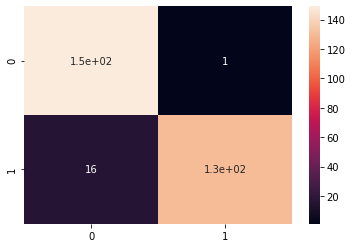

In [104]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(test_y,y_pred)

0.9425675675675675

#AdaBoost Classifier

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [108]:
ada = AdaBoostClassifier()
ada.fit(training_x,training_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [109]:
y_pred = ada.predict(test_x)

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("-----------------------------------------------------")
print(classification_report(test_y,y_pred))

[[146   4]
 [ 11 135]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       150
           1       0.97      0.92      0.95       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



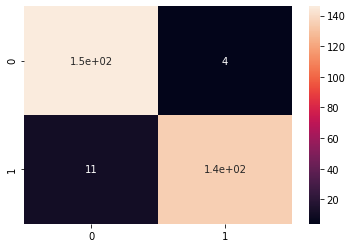

In [111]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(test_y,y_pred)

0.9493243243243243

#Xgboost Classifier

In [114]:
import xgboost as xgb

In [115]:
xgb = xgb.XGBClassifier()
xgb.fit(training_x,training_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [116]:
y_pred = xgb.predict(test_x)

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_y,y_pred))
print("-------------------------------------------------------")
print(classification_report(test_y,y_pred))

[[146   4]
 [ 12 134]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       150
           1       0.97      0.92      0.94       146

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



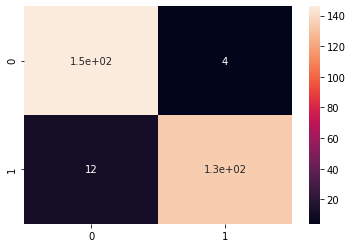

In [118]:
cm = confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True)

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
accuracy_score(test_y,y_pred)

0.9459459459459459

#All Model Define in a Single Block

In [121]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.svm import SVC
svc = SVC()
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [122]:
classifiers = {'LogisticRegression':lr,'DecisionTreeClassifier':dt,'KNeighborsClassifier':knn,
              'SVC':svc, 'SGDClassifier':sgd,'GaussianNB':gnb,'MultinomialNB':mnb,'BernoulliNB':bnb,
              'BaggingClassifier':bc,'RandomForestClassifier':rfc,'AdaBoostClassifier':ada,
              'XGBClassifier':xgb}
classifier=sorted(classifiers.keys())
print(classifier)
df=pd.DataFrame(classifier,columns=['Classifiers'])
df

['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'DecisionTreeClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'MultinomialNB', 'RandomForestClassifier', 'SGDClassifier', 'SVC', 'XGBClassifier']


,Classifiers
0,AdaBoostClassifier
1,BaggingClassifier
2,BernoulliNB
3,DecisionTreeClassifier
4,GaussianNB
5,KNeighborsClassifier
6,LogisticRegression
7,MultinomialNB
8,RandomForestClassifier
9,SGDClassifier


#Define results all model

In [123]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
parameter = []
res = []
res = pd.DataFrame(res)
for n, c in sorted(classifiers.items()):
  kfold = StratifiedKFold(n_splits=10, random_state=0)
  results = cross_val_score(c, X_under, y_under, cv=kfold)
  parameter.append((n,[results.mean()]))
  result = pd.DataFrame(results)
  res=pd.concat([res,result],axis=1,ignore_index=True)
res.columns = ['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'DecisionTreeClassifier',
               'GaussianNB','KNeighborsClassifier', 'LogisticRegression', 
               'MultinomialNB', 'RandomForestClassifier', 'SGDClassifier', 'SVC',
               'XGBClassifier']
res 

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,DecisionTreeClassifier,GaussianNB,KNeighborsClassifier,LogisticRegression,MultinomialNB,RandomForestClassifier,SGDClassifier,SVC,XGBClassifier
0,0.939394,0.979798,0.505051,0.919192,0.939394,0.969697,0.959596,0.959596,0.949495,0.979798,0.959596,0.949495
1,0.979798,0.979798,0.505051,0.929293,0.959596,0.979798,0.959596,0.949495,0.969697,0.969697,0.969697,0.989899
2,0.989899,0.979798,0.494949,0.929293,0.989899,0.969697,0.989899,0.979798,0.989899,1.000000,0.989899,0.989899
3,0.898990,0.858586,0.494949,0.858586,0.868687,0.878788,0.868687,0.818182,0.868687,0.939394,0.878788,0.888889
4,0.877551,0.846939,0.500000,0.826531,0.857143,0.877551,0.867347,0.826531,0.887755,0.897959,0.897959,0.867347
5,0.938776,0.918367,0.500000,0.857143,0.928571,0.928571,0.867347,0.806122,0.928571,0.948980,0.938776,0.928571
6,0.979592,0.969388,0.500000,0.918367,0.979592,0.989796,0.979592,0.969388,0.969388,0.938776,0.979592,0.969388
7,0.918367,0.897959,0.500000,0.846939,0.897959,0.918367,0.887755,0.846939,0.928571,0.918367,0.908163,0.908163
8,0.928571,0.938776,0.500000,0.867347,0.938776,0.969388,0.928571,0.857143,0.938776,0.938776,0.948980,0.948980
9,0.897959,0.887755,0.500000,0.836735,0.877551,0.877551,0.887755,0.816327,0.897959,0.908163,0.887755,0.887755


#Box plot all classifier

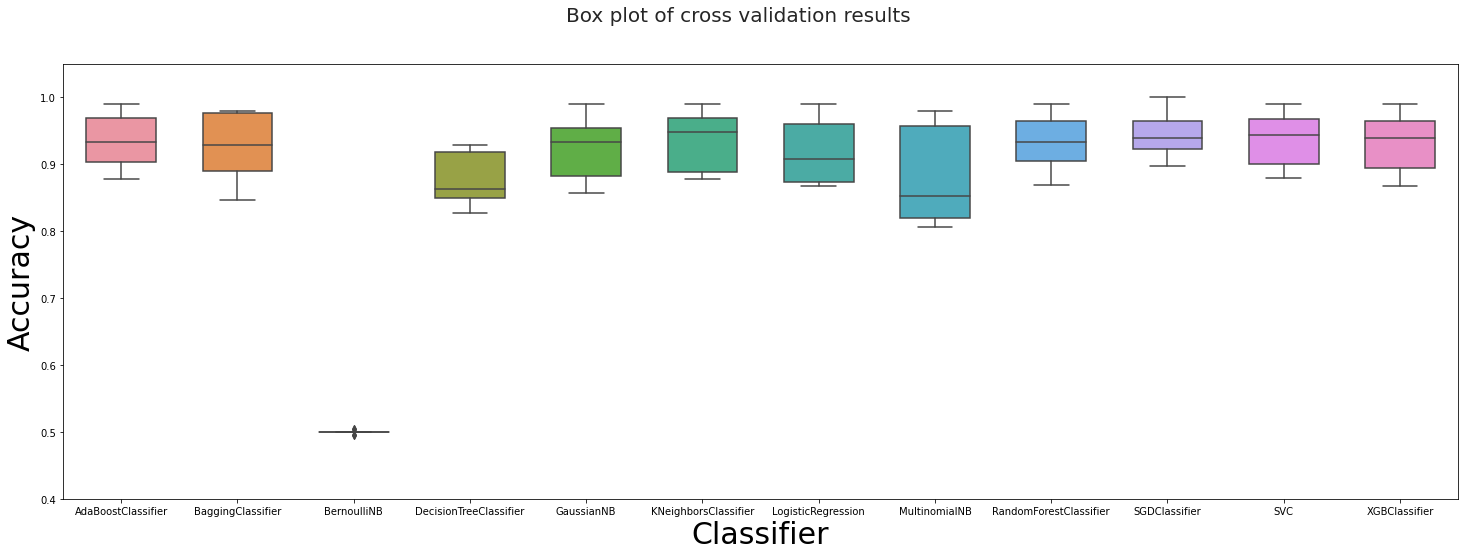

In [124]:
fig, ax = plt.subplots(figsize=(25,8))
sns.set(style='whitegrid')
boxplot=sns.boxplot(data=res,width=0.6)
boxplot.set_ylim([0.4,1.05])
fig.suptitle("Box plot of cross validation results",fontsize=20)
plt.xlabel("Classifier",fontsize=30)
plt.ylabel("Accuracy",fontsize=30)
plt.tick_params(axis='both', which='major', colors='black', labelsize=10)
plt.show()

#ROC and AUC Curve

1) Classifier is : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Total time in :  0.13019967079162598

Confusion_matrix is 
 [[146   4]
 [ 11 135]]

Precision :  0.9493243243243243
Recall    :  0.9493243243243243
f1_score  :  0.9493243243243243
AUC: 0.949
2) Classifier is : BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

Total time in :  0.03735756874084473

Confusion_matrix is 
 [[148   2]
 [ 15 131]]

Precision :  0.9425675675675675
Recall    :  0.9425675675675675
f1_score  :  0.9425675675675675
AUC: 0.942
3) Classifier is : BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Total time in :  0.0010228157043457031

Confusion_matrix is 
 [[150   0]
 [146   0]]

P

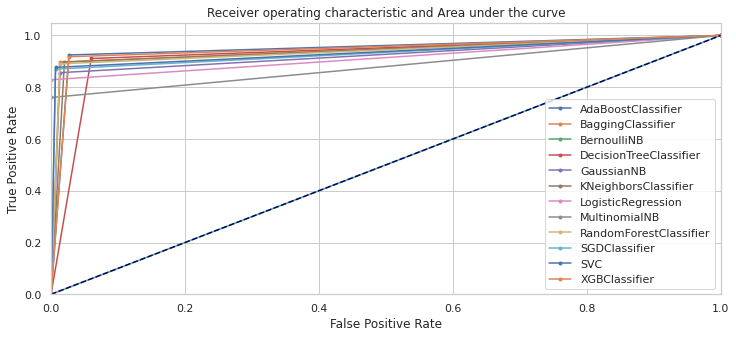

In [125]:
import time
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
score = []
i=1
plt.subplots(figsize=(12,5))
for n,c in sorted(classifiers.items()):
    start=time.time()
    c.fit(training_x,training_y)
    pred=c.predict(test_x)
    end=time.time()

    print("{}) Classifier is : {}\n".format(i,c))
    print("Total time in : ",end-start)

    score.append((n,[accuracy_score(test_y,pred,normalize=True),metrics.precision_score(test_y,pred,average='micro'),
                    metrics.recall_score(test_y, pred,average='micro'),metrics.f1_score(test_y,pred,average='micro')]))
    
    print("\nConfusion_matrix is \n",confusion_matrix(test_y,pred))
    precision=print("\nPrecision : ",metrics.precision_score(test_y,pred,average='micro'))      
    recall=print("Recall    : ",metrics.recall_score(test_y,pred,average='micro'))
    f1_score=print("f1_score  : ",metrics.f1_score(test_y,pred,average='micro'))
    
    # ROC AND AUC CURVE                                                             
    fpr,tpr,thresholds=roc_curve(test_y,pred)
    # calculate AUC
    auc=roc_auc_score(test_y,pred)
    print('AUC: %.3f' % auc)

    i=i+1
       
    plt.plot(fpr,tpr,marker='.',label=n)
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve')
plt.legend()
plt.show()                

In [126]:
score_df1=pd.DataFrame.from_dict(dict(score),orient='index',columns=['scores','Precision','Recall','f1_score'])
score_df1['Accuracy (%)']=score_df1['scores']*100
score_df1                     

,scores,Precision,Recall,f1_score,Accuracy (%)
AdaBoostClassifier,0.949324,0.949324,0.949324,0.949324,94.932432
BaggingClassifier,0.942568,0.942568,0.942568,0.942568,94.256757
BernoulliNB,0.506757,0.506757,0.506757,0.506757,50.675676
DecisionTreeClassifier,0.925676,0.925676,0.925676,0.925676,92.567568
GaussianNB,0.922297,0.922297,0.922297,0.922297,92.229730
KNeighborsClassifier,0.939189,0.939189,0.939189,0.939189,93.918919
LogisticRegression,0.915541,0.915541,0.915541,0.915541,91.554054
MultinomialNB,0.881757,0.881757,0.881757,0.881757,88.175676
RandomForestClassifier,0.939189,0.939189,0.939189,0.939189,93.918919
SGDClassifier,0.932432,0.932432,0.932432,0.932432,93.243243
